In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy.stats import chi2_contingency

In [3]:
full_df = pd.read_csv("data/full_df", index_col=0)

In [5]:
full_df.head()

,zipcode,American Indian and Alaska Native alone,Asian alone,Black or African American alone,Hispanic or Latino:,Native Hawaiian and Other Pacific Islander alone,Not Hispanic or Latino:,Some other race alone,Two or more races:,"Two races excluding Some other race, and three or more races",...,"$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","Less than $10,000",num_calls,city
0,97401,258,2664,761,4748,165,43438,1771,4792,3194,...,777,1200,1223,1171,1878,1476,2635,2435,34904,Eugene
1,97402,520,1228,1196,9013,118,45186,3290,6171,4163,...,1103,958,1647,782,2317,2261,3100,1374,32420,Eugene
2,97403,104,814,349,1261,76,13247,521,1541,1094,...,179,218,255,107,272,276,296,574,1898,Eugene
3,97404,408,726,443,3250,164,30106,700,3025,2113,...,239,345,506,484,1011,1339,1984,526,3443,Eugene
4,97405,285,1352,325,3500,186,43370,1076,4472,2336,...,452,612,383,668,1229,1380,2816,633,6044,Eugene


In [7]:
age_cols = ['10 to 14 years',
       '15 to 17 years', '18 and 19 years', '20 years', '21 years',
       '22 to 24 years', '25 to 29 years', '30 to 34 years', '35 to 39 years',
       '40 to 44 years', '45 to 49 years', '5 to 9 years', '50 to 54 years',
       '55 to 59 years', '60 and 61 years', '62 to 64 years',
       '65 and 66 years', '67 to 69 years', '70 to 74 years', '75 to 79 years',
       '80 to 84 years', '85 years and over', 'Under 5 years']

full_df["total_pop"] = full_df[age_cols].sum(axis=1)

In [9]:
full_df["calls_per_1000"] = (full_df["num_calls"] / full_df["total_pop"]) * 1000

/var/folders/_k/lb15blsd3qb04yljpcpq59_m0000gn/T/ipykernel_49000/1573562237.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(corr_df, x = "Value", y = "Variable", palette = colors)
/var/folders/_k/lb15blsd3qb04yljpcpq59_m0000gn/T/ipykernel_49000/1573562237.py:11: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(corr_df, x = "Value", y = "Variable", palette = colors)


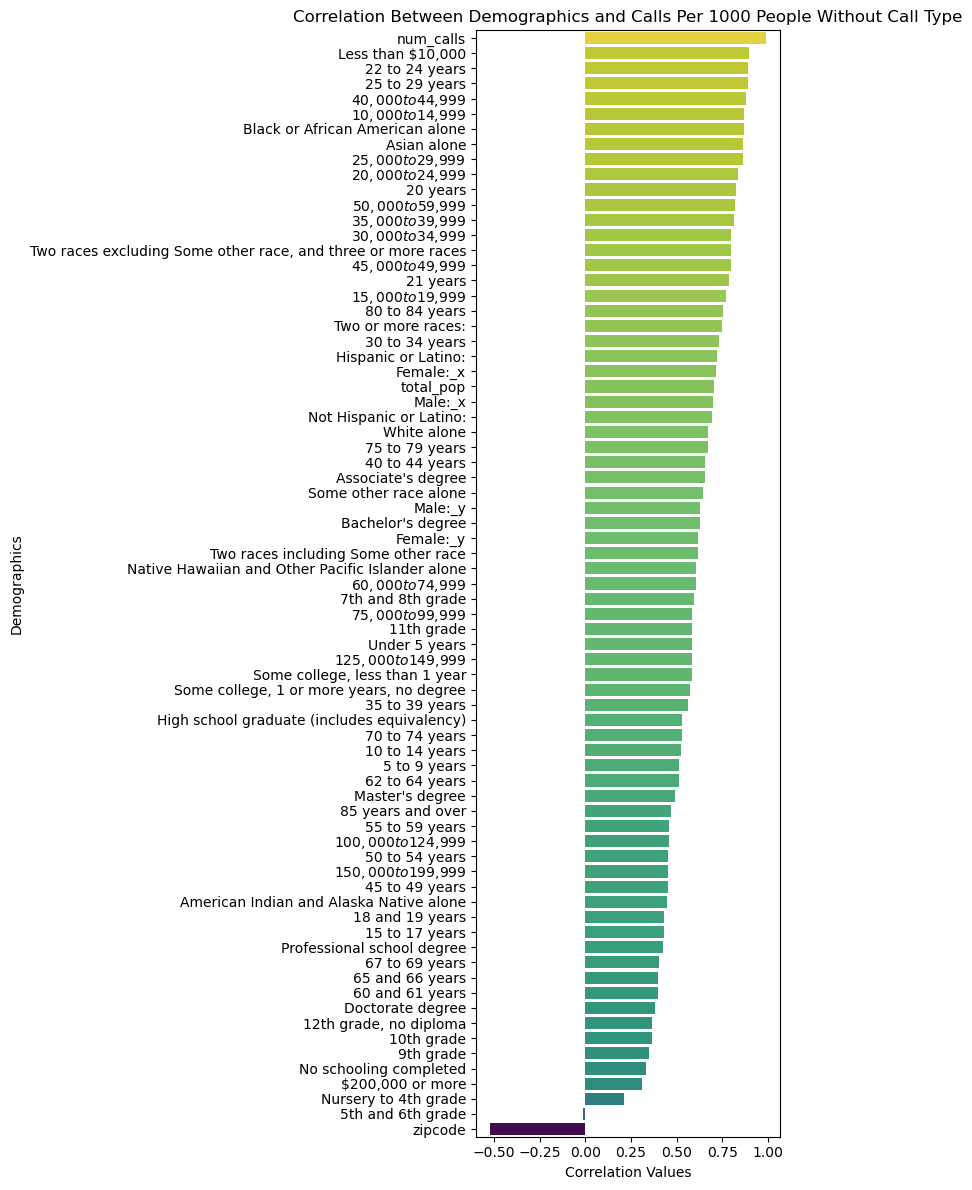

In [11]:
correlations = full_df.corr(numeric_only = True)
corr_dat = correlations["calls_per_1000"].drop(["calls_per_1000"])
corr_df = corr_dat.sort_values(ascending=False).reset_index()
corr_df.columns = ["Variable", "Value"]

normalize = plt.Normalize(corr_df["Value"].min(), corr_df["Value"].max())
cmap = sns.color_palette("viridis", as_cmap = True)
colors = cmap(normalize(corr_df["Value"]))

plt.figure(figsize=(8,12))
sns.barplot(corr_df, x = "Value", y = "Variable", palette = colors)
plt.title("Correlation Between Demographics and Calls Per 1000 People Without Call Type")
plt.xlabel("Correlation Values")
plt.ylabel("Demographics")
plt.tight_layout()
plt.show()

In [13]:
age_groups = {"0-17 years": ['Under 5 years', '5 to 9 years', '10 to 14 years', '15 to 17 years'],
              "18-29 years": ['18 and 19 years', '20 years', '21 years', '22 to 24 years', '25 to 29 years'],
              "30-49 years": ['30 to 34 years', '35 to 39 years', '40 to 44 years', '45 to 49 years'],
              "50-64 years": ['50 to 54 years', '55 to 59 years', '60 and 61 years', '62 to 64 years'],
              "65+ years": ['65 and 66 years', '67 to 69 years', '70 to 74 years', '75 to 79 years', '80 to 84 years', '85 years and over']}
for group, col in age_groups.items():
    full_df[group] = full_df[col].sum(axis=1)

In [15]:
income_groups = {"low income": ['Less than $10,000', '$10,000 to $14,999', '$15,000 to $19,999', '$20,000 to $24,999', '$25,000 to $29,999', 
                                '$30,000 to $34,999','$35,000 to $39,999'],
                 "mid income": ['$40,000 to $44,999', '$45,000 to $49,999', '$50,000 to $59,999', '$60,000 to $74,999'],
                 "high income": ['$75,000 to $99,999', '$100,000 to $124,999', '$125,000 to $149,999', '$150,000 to $199,999', '$200,000 or more']}

for group, col in income_groups.items():
    full_df[group] = full_df[col].sum(axis=1)

In [17]:
education_groups = {"0-12 grade": ['Nursery to 4th grade', '5th and 6th grade', '7th and 8th grade', '9th grade',
                                  '10th grade', '11th grade','12th grade, no diploma', 'High school graduate (includes equivalency)'],
                    "some college": ['Some college, 1 or more years, no degree', 'Some college, less than 1 year'],
                    "undergraduate": ["Bachelor's degree", "Associate's degree"],
                    "postgraduate": ['Doctorate degree', 'Professional school degree', "Master's degree"],
                    "no schooling": ['No schooling completed']}

for group, col in education_groups.items():
    full_df[group] = full_df[col].sum(axis=1)

In [19]:
clean_demographic_dat = full_df.drop(['Some other race alone',
'Two or more races:',
'Two races excluding Some other race, and three or more races',
'Two races including Some other race',
'Not Hispanic or Latino:',
'10 to 14 years',
 '15 to 17 years',
 '18 and 19 years',
 '20 years',
 '21 years',
 '22 to 24 years',
 '25 to 29 years',
 '30 to 34 years',
 '35 to 39 years',
 '40 to 44 years',
 '45 to 49 years',
 '5 to 9 years',
 '50 to 54 years',
 '55 to 59 years',
 '60 and 61 years',
 '62 to 64 years',
 '65 and 66 years',
 '67 to 69 years',
 '70 to 74 years',
 '75 to 79 years',
 '80 to 84 years',
 '85 years and over',
 'Female:_x',
 'Male:_x',
 'Under 5 years',
 '10th grade',
 '11th grade',
 '12th grade, no diploma',
 '5th and 6th grade',
 '7th and 8th grade',
 '9th grade',
 "Associate's degree",
 "Bachelor's degree",
 'Doctorate degree',
 'Female:_y',
 'High school graduate (includes equivalency)',
 'Male:_y',
 "Master's degree",
 'No schooling completed',
 'Nursery to 4th grade',
 'Professional school degree',
 'Some college, 1 or more years, no degree',
 'Some college, less than 1 year','$10,000 to $14,999',
 '$100,000 to $124,999',
 '$125,000 to $149,999',
 '$15,000 to $19,999',
 '$150,000 to $199,999',
 '$20,000 to $24,999',
 '$200,000 or more',
 '$25,000 to $29,999',
 '$30,000 to $34,999',
 '$35,000 to $39,999',
 '$40,000 to $44,999',
 '$45,000 to $49,999',
 '$50,000 to $59,999',
 '$60,000 to $74,999',
 '$75,000 to $99,999',
 'Less than $10,000',], axis=1)

In [21]:
clean_demographic_dat.columns

Index(['zipcode', 'American Indian and Alaska Native alone', 'Asian alone',
       'Black or African American alone', 'Hispanic or Latino:',
       'Native Hawaiian and Other Pacific Islander alone', 'White alone',
       'num_calls', 'city', 'total_pop', 'calls_per_1000', '0-17 years',
       '18-29 years', '30-49 years', '50-64 years', '65+ years', 'low income',
       'mid income', 'high income', '0-12 grade', 'some college',
       'undergraduate', 'postgraduate', 'no schooling'],
      dtype='object')

In [23]:
clean_demographic_dat["quartiles"] = pd.qcut(clean_demographic_dat["calls_per_1000"], 4, labels = ["Q1", "Q2", "Q3", "Q4"])

clean_demographic_dat.head()

,zipcode,American Indian and Alaska Native alone,Asian alone,Black or African American alone,Hispanic or Latino:,Native Hawaiian and Other Pacific Islander alone,White alone,num_calls,city,total_pop,...,65+ years,low income,mid income,high income,0-12 grade,some college,undergraduate,postgraduate,no schooling,quartiles
0,97401,258,2664,761,4748,165,37775,34904,Eugene,48186,...,8606,8908,5748,8334,5609,6872,10927,5756,183,Q4
1,97402,520,1228,1196,9013,118,41676,32420,Eugene,54199,...,8295,7634,7007,8436,13157,10558,10026,3842,359,Q4
2,97403,104,814,349,1261,76,11103,1898,Eugene,14508,...,1558,2049,910,1755,970,985,1981,2046,14,Q4
3,97404,408,726,443,3250,164,27890,3443,Eugene,33356,...,6885,2841,3340,6983,7455,6016,7718,3037,307,Q3
4,97405,285,1352,325,3500,186,39174,6044,Eugene,46870,...,11067,4180,3660,11748,4714,7447,11696,10313,223,Q3


In [25]:
selected_demographics = [
    # Race columns
    'White alone', 'Black or African American alone', 'Hispanic or Latino:',
    'Asian alone', 'American Indian and Alaska Native alone', 'Native Hawaiian and Other Pacific Islander alone',

    # Age columns
    '0-17 years', '18-29 years', '30-49 years', '50-64 years', '65+ years',

    # Income columns
    'low income', 'mid income', 'high income',

    # Education columns
    '0-12 grade', 'some college', 'undergraduate', 'postgraduate', 'no schooling']

demographic_means = clean_demographic_dat.groupby("quartiles")[selected_demographics].mean().round()
demographic_means

/var/folders/_k/lb15blsd3qb04yljpcpq59_m0000gn/T/ipykernel_49000/461482248.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demographic_means = clean_demographic_dat.groupby("quartiles")[selected_demographics].mean().round()


,White alone,Black or African American alone,Hispanic or Latino:,Asian alone,American Indian and Alaska Native alone,Native Hawaiian and Other Pacific Islander alone,0-17 years,18-29 years,30-49 years,50-64 years,65+ years,low income,mid income,high income,0-12 grade,some college,undergraduate,postgraduate,no schooling
quartiles,,,,,,,,,,,,,,,,,,,
Q1,10380.0,44.0,917.0,185.0,132.0,5.0,2307.0,1769.0,2942.0,2544.0,2428.0,1202.0,1113.0,2441.0,3045.0,2424.0,2372.0,624.0,57.0
Q2,14386.0,252.0,2167.0,406.0,174.0,17.0,3476.0,2998.0,4637.0,3320.0,3586.0,2064.0,1890.0,3677.0,3742.0,3756.0,3619.0,1525.0,166.0
Q3,33532.0,384.0,3375.0,1039.0,346.0,175.0,7198.0,5652.0,10274.0,8013.0,8976.0,3510.0,3500.0,9366.0,6084.0,6732.0,9707.0,6675.0,265.0
Q4,30185.0,769.0,5007.0,1569.0,294.0,120.0,5939.0,12387.0,9078.0,5407.0,6153.0,6197.0,4555.0,6175.0,6579.0,6138.0,7645.0,3881.0,185.0


/var/folders/_k/lb15blsd3qb04yljpcpq59_m0000gn/T/ipykernel_49000/2440767827.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,0].set_xticklabels(["White", "Black/African American", "Hispanic/Latino", "Asian", "Native American", "Native Hawaiian/Pacific Islander"])
/var/folders/_k/lb15blsd3qb04yljpcpq59_m0000gn/T/ipykernel_49000/2440767827.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1,0].set_xticklabels(["0-17", "18-29", "30-49", "50-64", "65+"]);
/var/folders/_k/lb15blsd3qb04yljpcpq59_m0000gn/T/ipykernel_49000/2440767827.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,1].set_xticklabels(["Low", "Middle", "High"])
/var/folders/_k/lb15blsd3qb04yljpcpq59_m0000gn/T/ipykernel_49000/2440767827.py:40: UserWarning: s

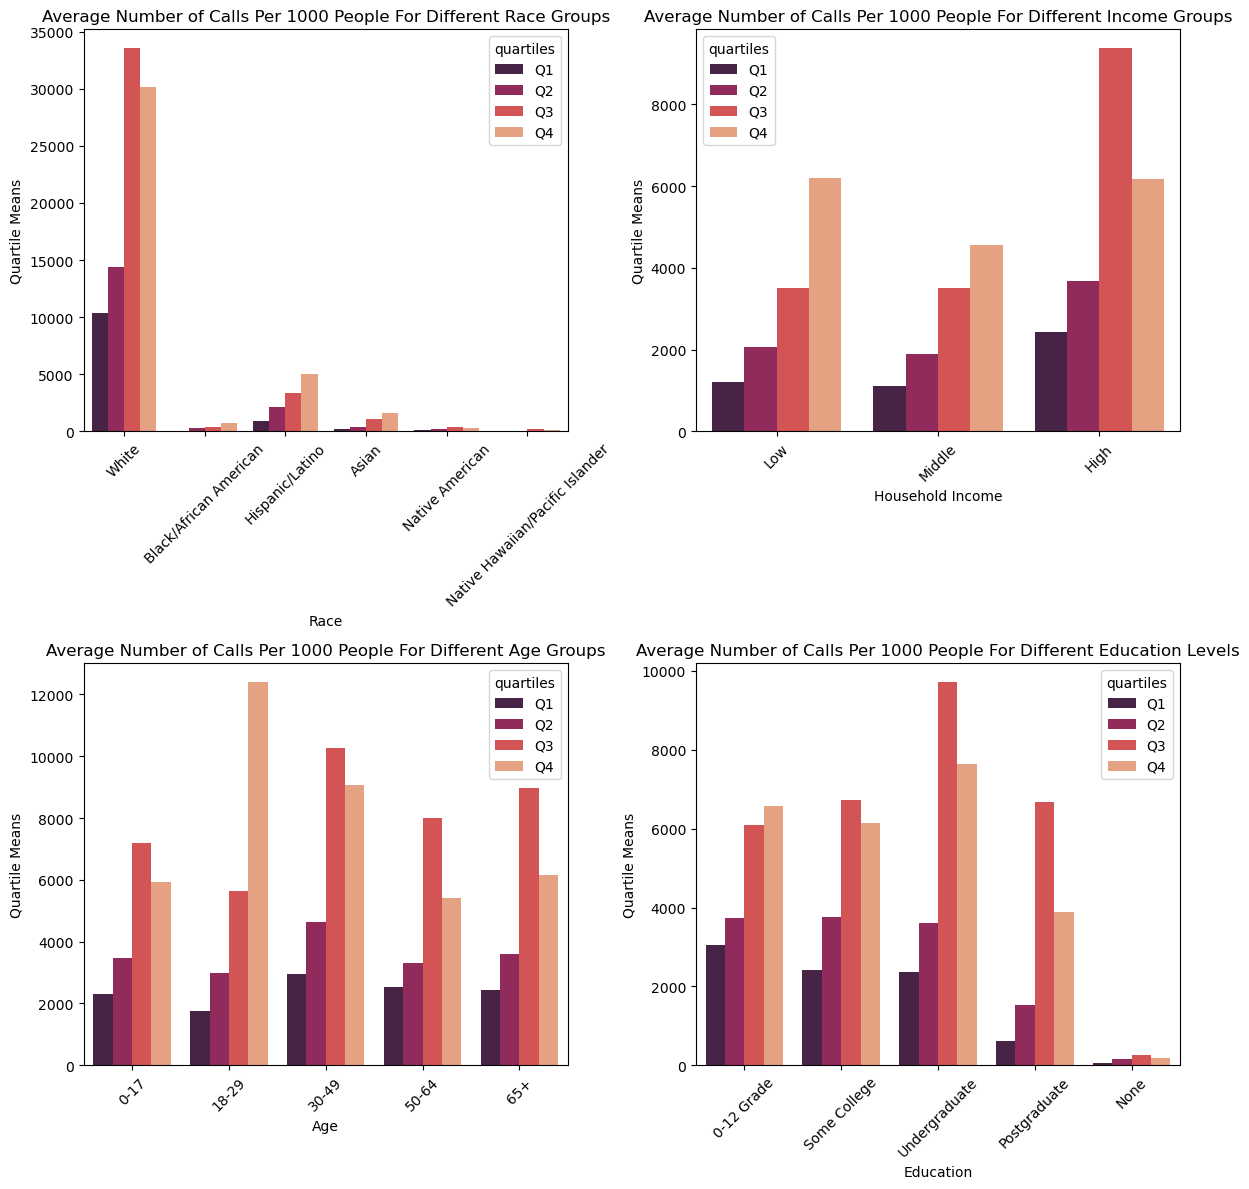

In [27]:
race_cols = demographic_means[['White alone', 'Black or African American alone', 'Hispanic or Latino:',
    'Asian alone', 'American Indian and Alaska Native alone', 'Native Hawaiian and Other Pacific Islander alone']]

age_cols = demographic_means[['0-17 years', '18-29 years', '30-49 years', '50-64 years', '65+ years']]

income_cols = demographic_means[['low income', 'mid income', 'high income']]

education_cols = demographic_means[['0-12 grade', 'some college', 'undergraduate', 'postgraduate', 'no schooling']]

race_melt = race_cols.reset_index().melt(id_vars = "quartiles", var_name = "race", value_name = "mean")
age_melt = age_cols.reset_index().melt(id_vars = "quartiles", var_name = "age", value_name = "mean")
income_melt = income_cols.reset_index().melt(id_vars = "quartiles", var_name = "income", value_name = "mean")
education_melt = education_cols.reset_index().melt(id_vars = "quartiles", var_name = "education", value_name = "mean")

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

sns.barplot(race_melt, x = "race", y = "mean", hue = "quartiles", ax=ax[0, 0], palette="rocket")
ax[0, 0].tick_params(axis = "x", rotation=45)
ax[0,0].set_xticklabels(["White", "Black/African American", "Hispanic/Latino", "Asian", "Native American", "Native Hawaiian/Pacific Islander"])
ax[0,0].set_xlabel("Race")
ax[0,0].set_ylabel("Quartile Means")
ax[0,0].set_title("Average Number of Calls Per 1000 People For Different Race Groups")
                       
sns.barplot(age_melt, x = "age", y = "mean", hue = "quartiles", ax=ax[1, 0], palette="rocket")
ax[1, 0].tick_params(axis = "x", rotation=45)
ax[1,0].set_xticklabels(["0-17", "18-29", "30-49", "50-64", "65+"]);
ax[1,0].set_xlabel("Age")
ax[1,0].set_ylabel("Quartile Means")
ax[1,0].set_title("Average Number of Calls Per 1000 People For Different Age Groups")

sns.barplot(income_melt, x = "income", y = "mean", hue = "quartiles", ax=ax[0, 1], palette="rocket")
ax[0, 1].tick_params(axis = "x", rotation=45)
ax[0,1].set_xticklabels(["Low", "Middle", "High"])
ax[0,1].set_xlabel("Household Income")
ax[0,1].set_ylabel("Quartile Means")
ax[0,1].set_title("Average Number of Calls Per 1000 People For Different Income Groups")

sns.barplot(education_melt, x = "education", y = "mean", hue = "quartiles", ax=ax[1, 1], palette="rocket")
ax[1, 1].tick_params(axis = "x", rotation=45)
ax[1,1].set_xticklabels(["0-12 Grade", "Some College", "Undergraduate", "Postgraduate", "None"])
ax[1,1].set_xlabel("Education")
ax[1,1].set_ylabel("Quartile Means")
ax[1,1].set_title("Average Number of Calls Per 1000 People For Different Education Levels")

fig.tight_layout()
fig.savefig('demographic_barplots.')

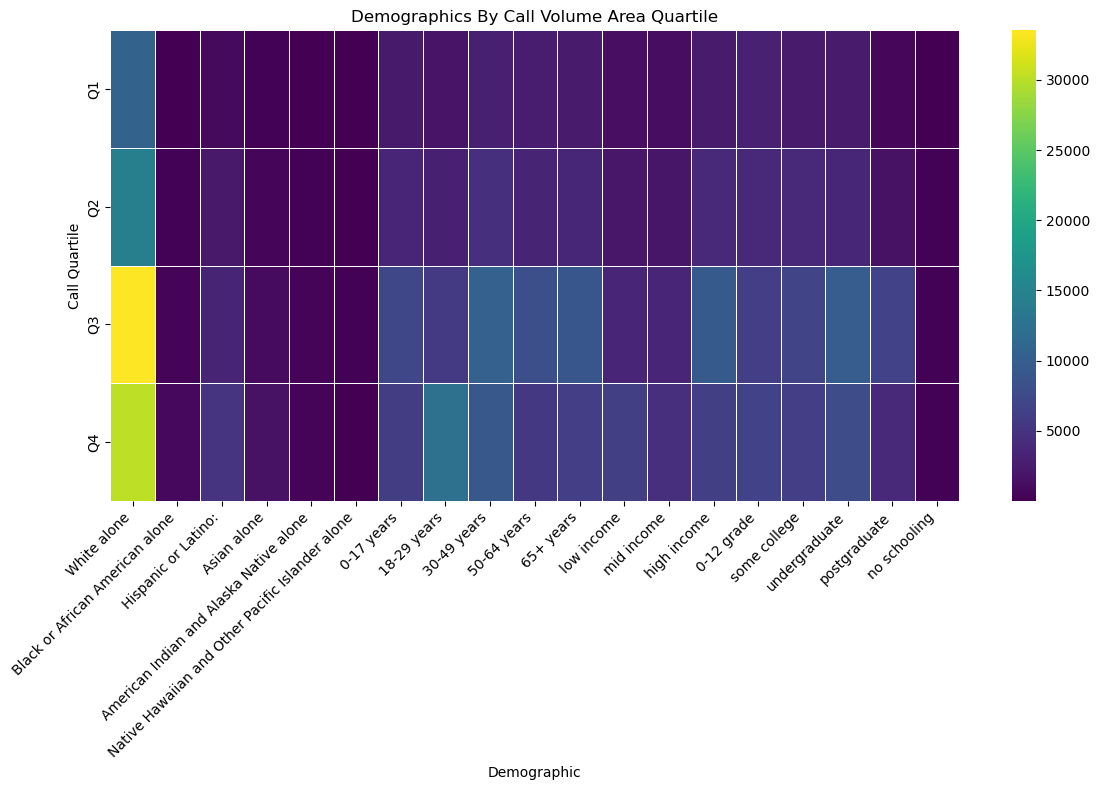

In [41]:
plt.figure(figsize=(12, 8))
sns.heatmap(demographic_means, cmap="viridis", linewidths=0.5)
plt.title("Demographics By Call Volume Area Quartile")
plt.ylabel("Call Quartile")
plt.xlabel("Demographic")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

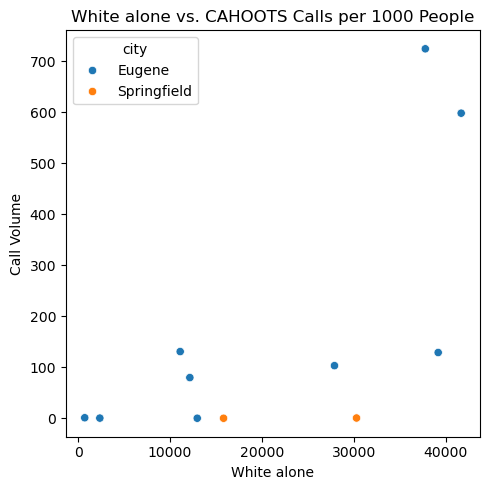

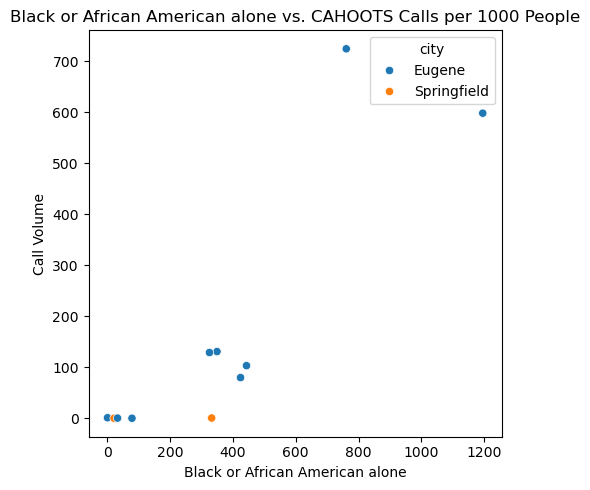

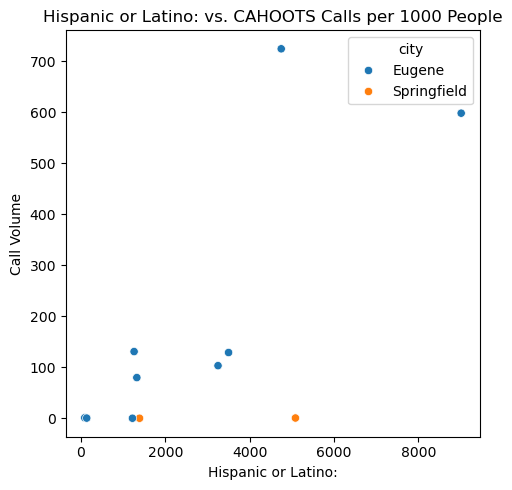

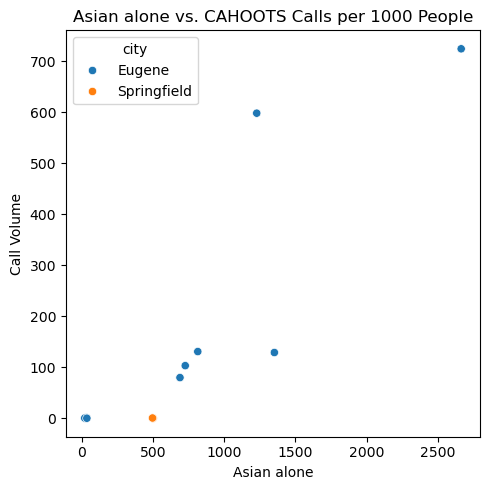

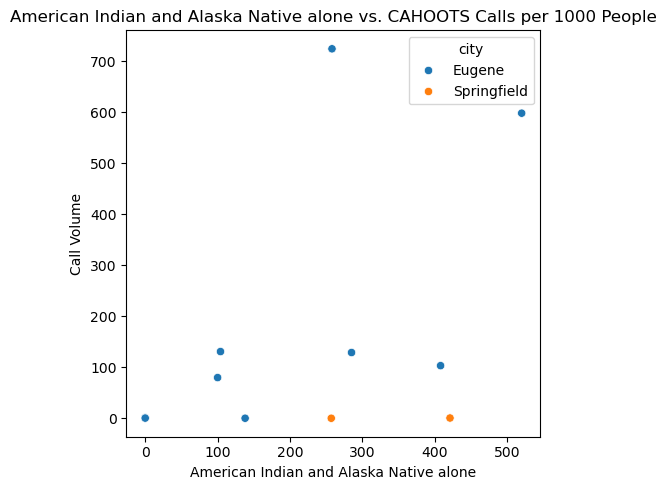

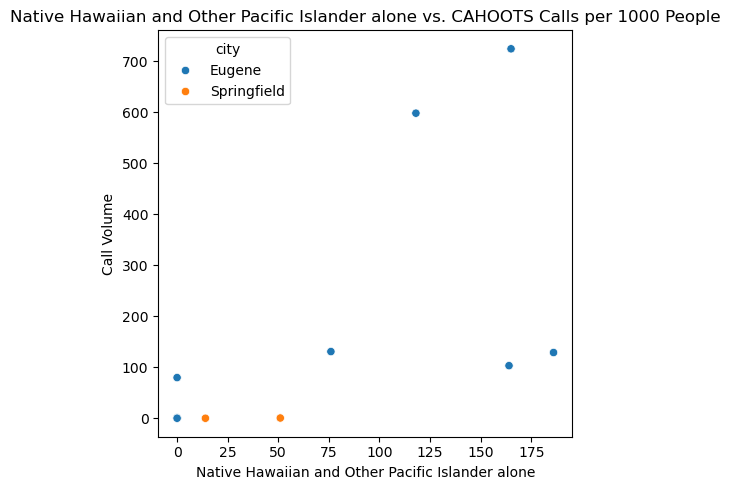

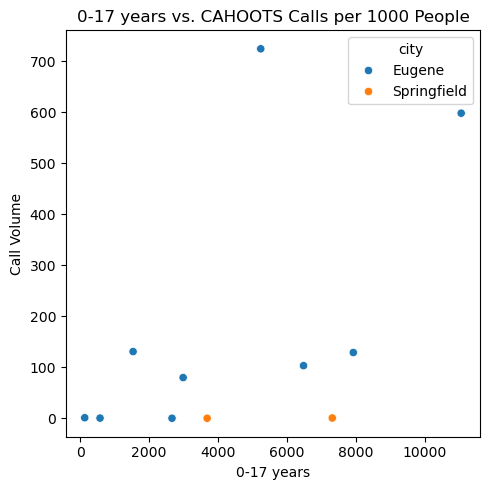

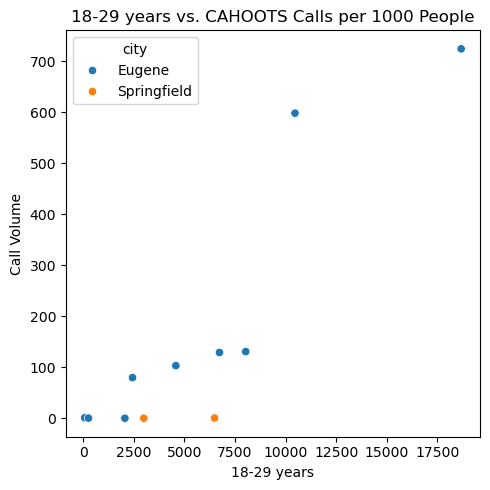

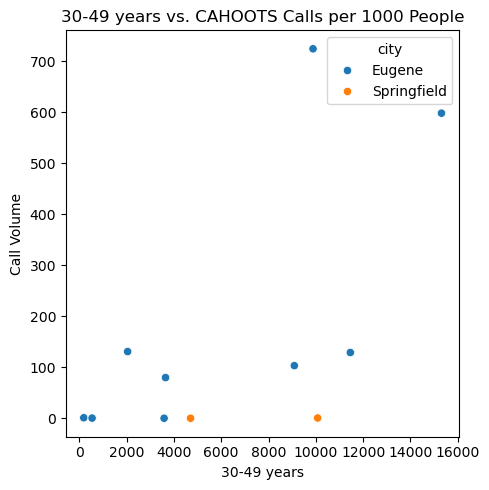

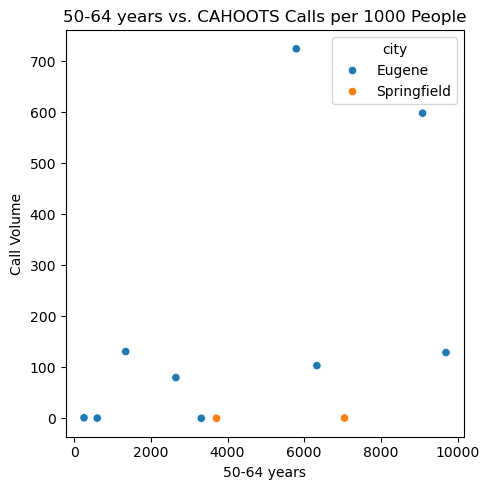

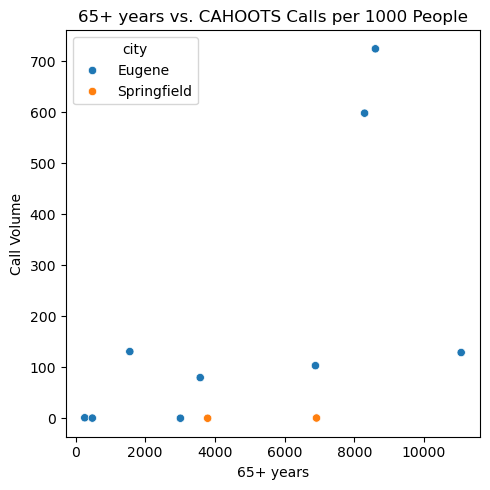

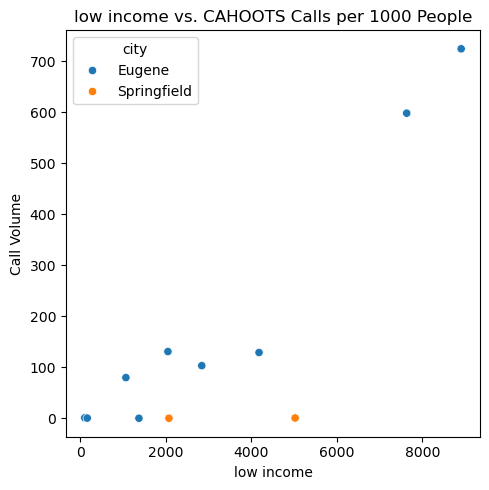

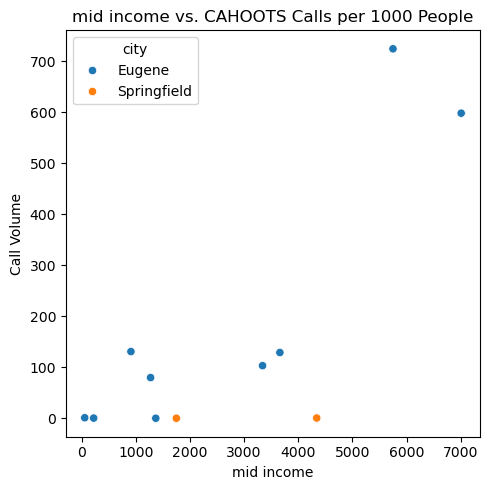

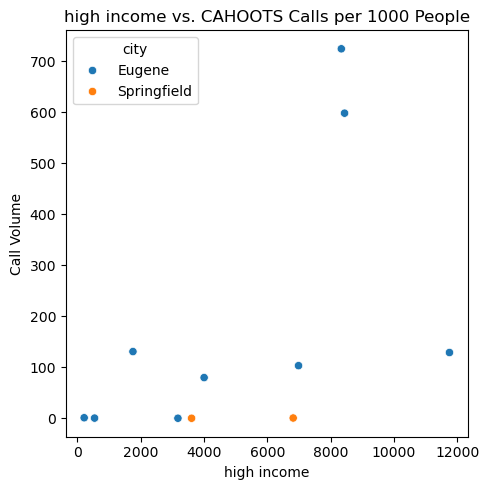

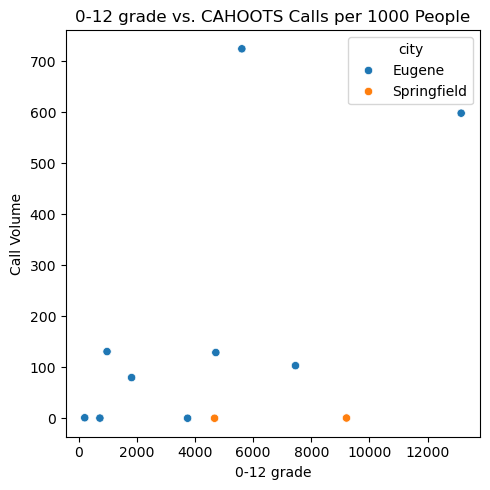

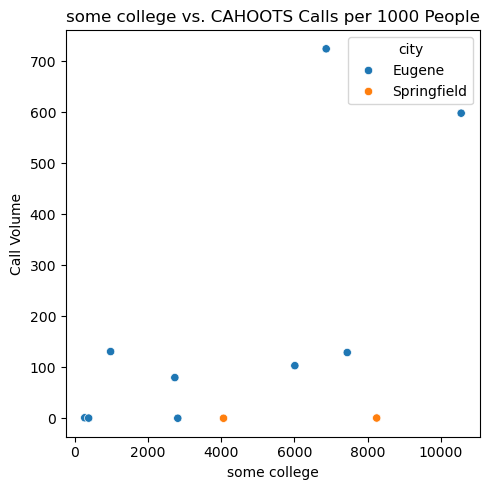

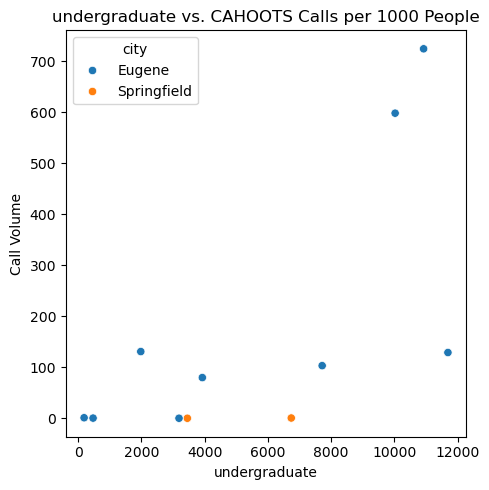

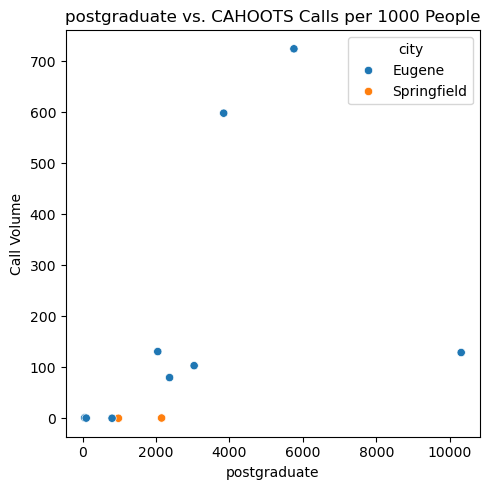

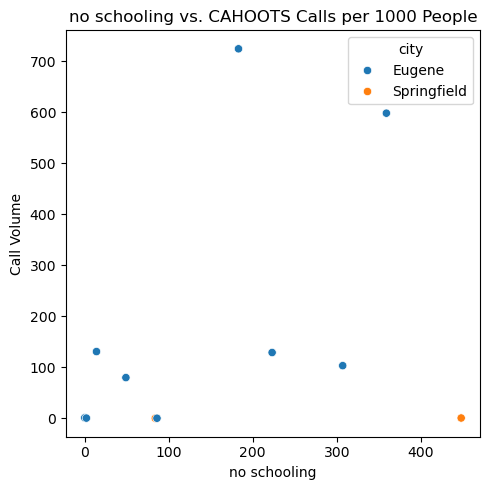

In [45]:
for col in selected_demographics:
    plt.figure(figsize=(5,5))
    sns.scatterplot(clean_demographic_dat, x = col, y = "calls_per_1000", hue = "city")
    plt.title(f'{col} vs. CAHOOTS Calls per 1000 People')
    plt.xlabel(f'{col}')
    plt.ylabel("Call Volume")
    plt.tight_layout()

In [33]:
demographic_corr = clean_demographic_dat.corr(numeric_only=True)["calls_per_1000"].sort_values(ascending=False)
demographic_corr

calls_per_1000                                      1.000000
num_calls                                           0.990530
18-29 years                                         0.892538
low income                                          0.872401
Black or African American alone                     0.866591
Asian alone                                         0.865873
mid income                                          0.789473
Hispanic or Latino:                                 0.718843
total_pop                                           0.706681
White alone                                         0.672157
undergraduate                                       0.670761
30-49 years                                         0.627469
Native Hawaiian and Other Pacific Islander alone    0.607508
some college                                        0.579524
65+ years                                           0.552763
high income                                         0.526889
0-17 years              

In [35]:
city_demographic_dat = clean_demographic_dat.drop(["quartiles", "zipcode", "num_calls", "total_pop", "calls_per_1000"], axis=1).groupby("city").sum()
city_demographic_dat

,American Indian and Alaska Native alone,Asian alone,Black or African American alone,Hispanic or Latino:,Native Hawaiian and Other Pacific Islander alone,White alone,0-17 years,18-29 years,30-49 years,50-64 years,65+ years,low income,mid income,high income,0-12 grade,some college,undergraduate,postgraduate,no schooling
city,,,,,,,,,,,,,,,,,,,
Eugene,1813,7560,3608,24549,709,185806,38571,53291,55739,39075,43747,28314,23586,45191,38388,38099,50126,28316,1223
Springfield,678,996,353,6475,65,46111,10991,9478,14779,10764,10706,7097,6089,10420,13880,12318,10195,3124,532


In [37]:
race_table = city_demographic_dat[['White alone', 'Black or African American alone', 'Hispanic or Latino:',
    'Asian alone', 'American Indian and Alaska Native alone', 'Native Hawaiian and Other Pacific Islander alone']]

age_table = city_demographic_dat[['0-17 years', '18-29 years', '30-49 years', '50-64 years', '65+ years']]

income_table = city_demographic_dat[['low income', 'mid income', 'high income']]

education_table = city_demographic_dat[['0-12 grade', 'some college', 'undergraduate', 'postgraduate', 'no schooling']]

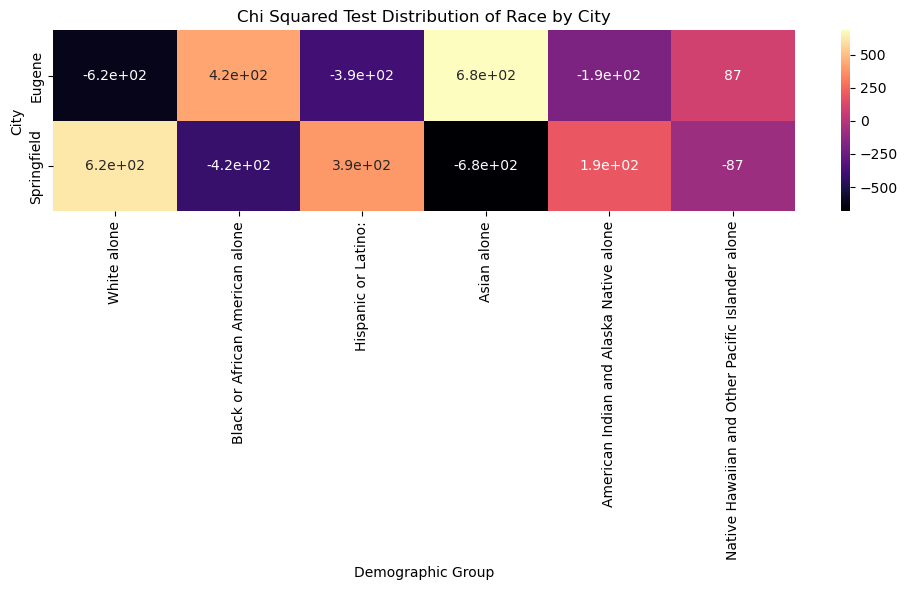

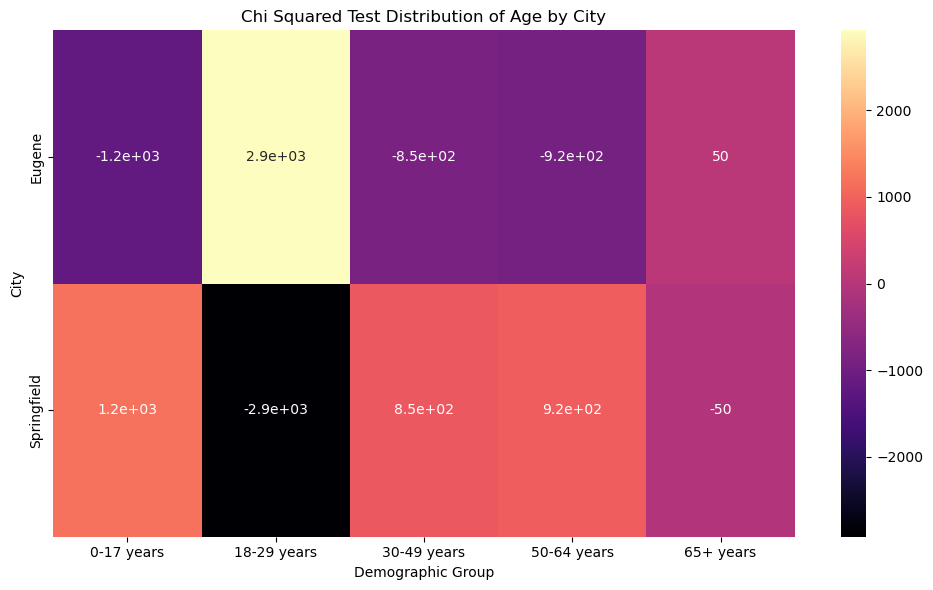

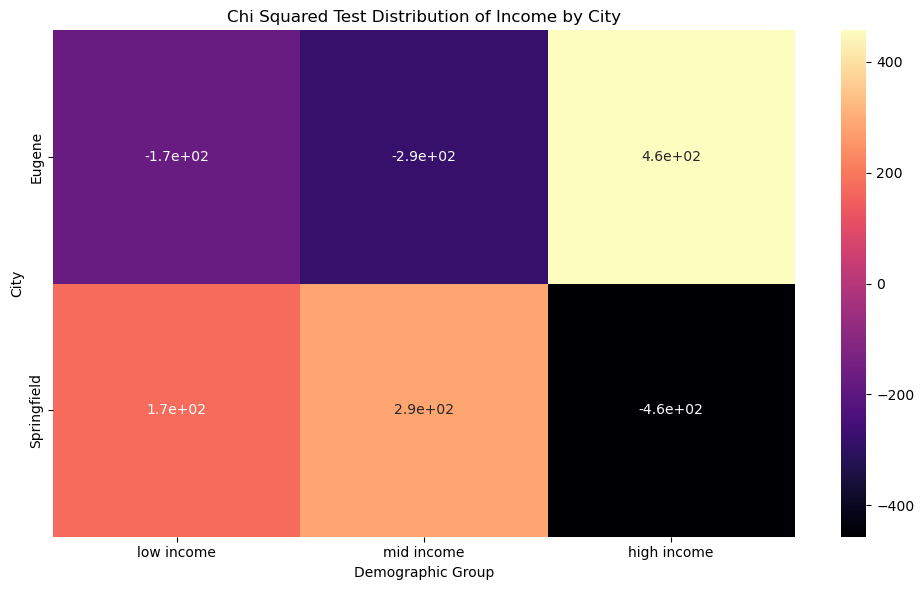

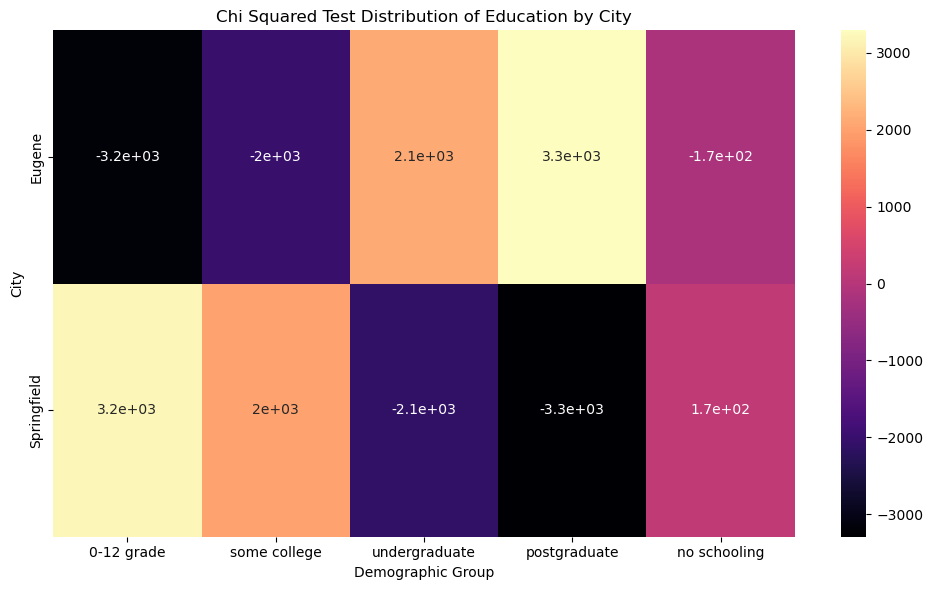

In [39]:
def chi_squared_test(df, label):
    
    chi2, p, dof, expected = chi2_contingency(df)
    
    expected = pd.DataFrame(expected, index=df.index, columns=df.columns)
    difference = df - expected

    plt.figure(figsize=(10, 6))
    sns.heatmap(difference, cmap="magma", annot=True)
    plt.title(label)
    plt.xlabel("Demographic Group")
    plt.ylabel("City")
    plt.tight_layout()


chi_squared_test(race_table, "Chi Squared Test Distribution of Race by City")
chi_squared_test(age_table, "Chi Squared Test Distribution of Age by City")
chi_squared_test(income_table, "Chi Squared Test Distribution of Income by City")
chi_squared_test(education_table, "Chi Squared Test Distribution of Education by City")